<a href="https://colab.research.google.com/github/sujit-kumar-singh-9115/Alma-Better-Capstone-Project/blob/main/AlmaBetter_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# Importing packages
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data file from the drive.
hotel_booking_df  = pd.read_csv('/content/drive/MyDrive/Alma-Better Folder/Module 1/Capstone project - EDA/Hotel Bookings.csv')

# Let's Check the Data

In [5]:
# let's check the data.
hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Now we will try to check the shape of the Data

In [6]:
# Checking the shape of the data.
hotel_booking_df.shape  

(119390, 32)

## Now we wil see the various  columns and their names present in the data

In [7]:
# Checking the columns present in the data.
hotel_booking_df.columns   

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Since data type is important factor while data Wrangling, we check it and along with datatype we will have a note of the null values present in the dataset

In [8]:
# Checking the total non-null values count and datatypes of the coloumns.
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Now we will understand the numerical information of our data.

In [9]:
# Now we will understand the numerical information of our data.
hotel_booking_df.describe(include ='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## By using (include = 'all') we can explore more about our coloums, such as its total no. of count, no. of unique values, frequency, etc.

## Next step we will take is to figue out the count of null values in different columns 

In [10]:
hotel_booking_df.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

## As we can clearly see that there are four coloumns containing the null values namely country, agent, company and children.


## Taking notes of the result will help us in the analysis the dataset and exploring the different correlation 

In [11]:
hotel_booking_exploring_table = [[column,hotel_booking_df[column].dtypes,hotel_booking_df[column].isnull().sum(),hotel_booking_df[column].nunique(),
                                   hotel_booking_df[column].unique()] for column in hotel_booking_df.columns] 
                                   
hotel_booking_df_exploring_table = pd.DataFrame(hotel_booking_exploring_table,columns = ['Column', 'Dtype', 'Null','nUnique', 'Unique'])

hotel_booking_df_exploring_table 


,Column,Dtype,Null,nUnique,Unique
0,hotel,object,0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,2,"[0, 1]"
2,lead_time,int64,0,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Data integrity is necessary to ensure a successful analysis
# In section we will take all the necessary measures to ensure that the data is clean and ready for analysis.

## we will create the copy of our original data

In [50]:
# we will create the copy of our original data
df_hotel_booking = hotel_booking_df.copy()

# As we know that there are four coloumns containing the null values namely country, agent, company and children. 
# We will replace or fill these null values 

Filling null values with 0 of company column.

In [53]:
# Filling null values with 0 of company column.
df_hotel_booking ['company'].fillna(0 , inplace = True) 

Filling null values with 0 of agent column.       

In [54]:
# Filling null values with 0 of agent column.          
df_hotel_booking['agent'].fillna(0 , inplace = True)  

Replacig the null values with others in country coloumn.

In [55]:
# Replacig the null values with 'others' in country coloumn.
df_hotel_booking['country'].fillna('Others',inplace = True)

Filling null values with its mean value of children column.

In [56]:
# Filling null values with its 'mean' of children column.
df_hotel_booking['children'].fillna(df_hotel_booking.children.mean(), inplace = True)

## In the datatype verification we saw that the numerical column agent, company and children have float64 datatype so we will convert it to int64 datatype

Converting company column datatype for float64 to int64

In [57]:
df_hotel_booking['company'] = df_hotel_booking['company'].astype(int) 

Converting children column datatype for float64 to int64

In [58]:
df_hotel_booking['children'] = df_hotel_booking['children'].astype(int) 

Converting agent column datatype for float64 to int64

In [59]:
df_hotel_booking['agent'] = df_hotel_booking['agent'].astype(int) 

# Now we will remove duplicate data which can affect the data analysis

In [60]:
df_hotel_booking[df_hotel_booking.duplicated()].shape

(31994, 32)

## We see that there are 31994 duplicate observations.

## so we will get ride of it as a data cleaning process.

In [61]:
df_hotel_booking.drop_duplicates(inplace = True)

## As we see that the sum of Adult,Babies, and Children are zero. This that it is not true data.
## So we will drop these observation as a part of data cleaning  

In [62]:
df_hotel_booking[df_hotel_booking.adults + df_hotel_booking.babies + df_hotel_booking.children == 0].shape

(166, 32)

In [63]:
df_hotel_booking.drop(df_hotel_booking[df_hotel_booking.adults + df_hotel_booking.babies + df_hotel_booking.children == 0].index, inplace = True)

# Now we see the final shape of our data

In [64]:
df_hotel_booking.shape

(87230, 32)

# We will rename columns to make the data set more understandable and and some new columns for better visualization

## Changing the adr column name to average_daily_rate

In [65]:
df_hotel_booking.rename(columns = {'adr' : 'average_daily_rate'}, inplace = True)

# Adding new columns

## adding Total_group_members column for the total numbers of adults,children and babies

In [66]:
df_hotel_booking['Total_group_members'] = df_hotel_booking.adults + df_hotel_booking.children + df_hotel_booking.babies

## adding stays_in_weekend_and_weeks column for the total days of stay

In [67]:
df_hotel_booking['stays_in_weekend_and_weeks'] = df_hotel_booking.stays_in_weekend_nights + df_hotel_booking.stays_in_week_nights

In [71]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           87230 non-null  object  
 1   is_canceled                     87230 non-null  int64   
 2   lead_time                       87230 non-null  int64   
 3   arrival_date_year               87230 non-null  int64   
 4   arrival_date_month              87230 non-null  category
 5   arrival_date_week_number        87230 non-null  int64   
 6   arrival_date_day_of_month       87230 non-null  int64   
 7   stays_in_weekend_nights         87230 non-null  int64   
 8   stays_in_week_nights            87230 non-null  int64   
 9   adults                          87230 non-null  int64   
 10  children                        87230 non-null  int64   
 11  babies                          87230 non-null  int64   
 12  meal             

## Understanding the relation between stays_in_weekend_and_weeks and  average_daily_rate with the help of scatterplot

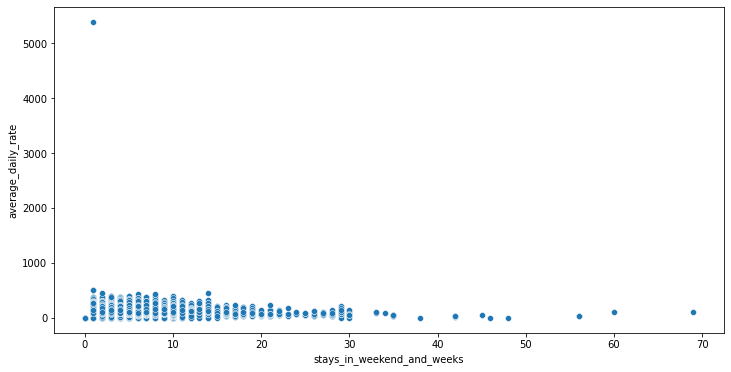

In [69]:
# Understanding the scenerio using the scatterplot.
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'average_daily_rate', x = 'stays_in_weekend_and_weeks', data = df_hotel_booking)
plt.show()

# Removing an outlier from average_daily_rate column

In [30]:
# Removing all the values greater than 5000.
df_hotel_booking.drop(df_hotel_booking[df_hotel_booking['average_daily_rate'] > 5000].index, inplace = True)

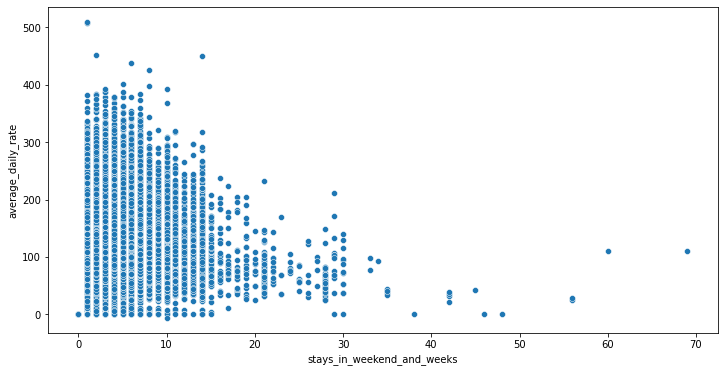

In [31]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'average_daily_rate', x = 'stays_in_weekend_and_weeks', data = df_hotel_booking)
plt.show()

# From the above scatter plot we can conclude that  stays_in_weekend_and_weeks and average_daily_rate hac a negative correlation. This means that, the longer the stay - better the deal for the customers.

# Analysis of dataset on the basis of Services and amenities attached with differnt Hotel Type

In [32]:
types_of_hotel = hotel_booking_df['hotel'].value_counts()
types_of_hotel

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

# Type of Hotels preferred

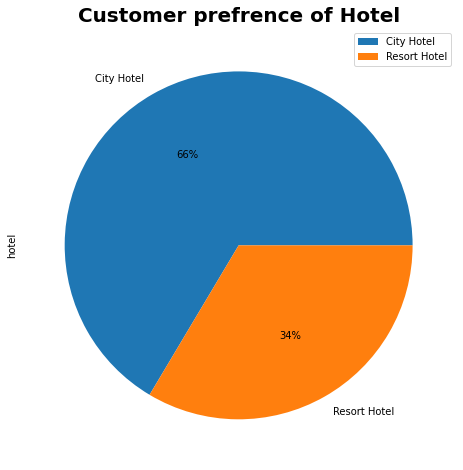

In [33]:
# Type of Hotels preferred
plt.figure(figsize = (14,8))
types_of_hotel.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%')
plt.legend() 
plt.title('Customer prefrence of Hotel',fontweight="bold", size=20)
plt.show()

### As we can see the most of the Guests/customer prefferd City hotel over the resort hotel

# Type of Meal prefrence

In [34]:
type_of_meal_preference =  hotel_booking_df[hotel_booking_df['meal'] != 'Undefined']
type_of_meal_preference['meal'].value_counts()

BB    92310
HB    14463
SC    10650
FB      798
Name: meal, dtype: int64

Hotel Meals abbreviations and their full forms'

BB --bed and breakfast.

HB --half board (in which breakfast and dinner are included.)

FB--full board (in which breakfast, lunch and dinner are included.)

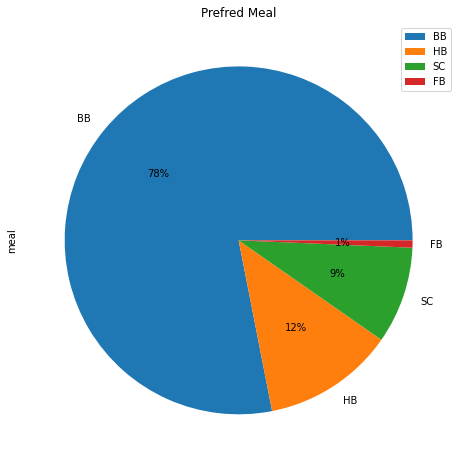

In [35]:
plt.figure(figsize = (14,8))
type_of_meal_preference['meal'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Prefred Meal')
plt.legend()
plt.show()

## The most prefered meal 'BB' type of meal 

BB --bed and breakfast.





# Percentage of share of distribution_channel

In [36]:
type_of_distribution_channel = hotel_booking_df[hotel_booking_df['distribution_channel'] != 'Undefined']
type_of_distribution_channel['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Name: distribution_channel, dtype: int64

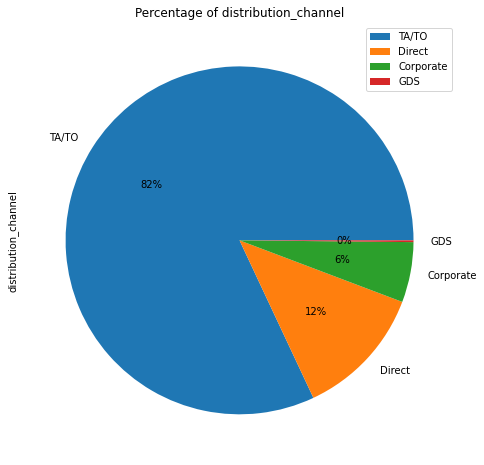

In [37]:
plt.figure(figsize = (14,8))
type_of_distribution_channel['distribution_channel'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Percentage of distribution_channel')
plt.legend()
plt.show()

### TA/TO has the largest share of the market which is around 82%

# Percentage of repeated_guest

In [38]:
hotel_booking_df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

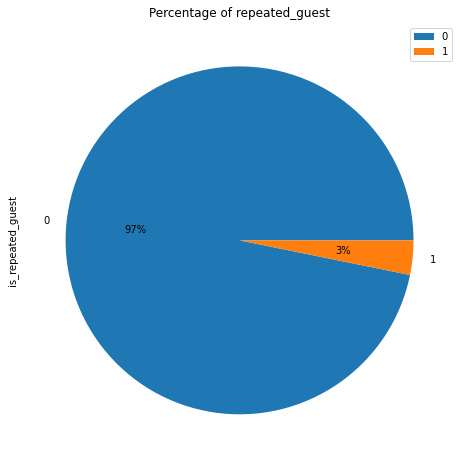

In [39]:
plt.figure(figsize = (14,8))
hotel_booking_df['is_repeated_guest'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Percentage of repeated_guest')
plt.legend()
plt.show()

Asuming 0 = False and 1 = True

The guest retention rate is 'very low'. Only 3% of guest are Repeating.

# Analysis of dataset on the basis of type of customer.

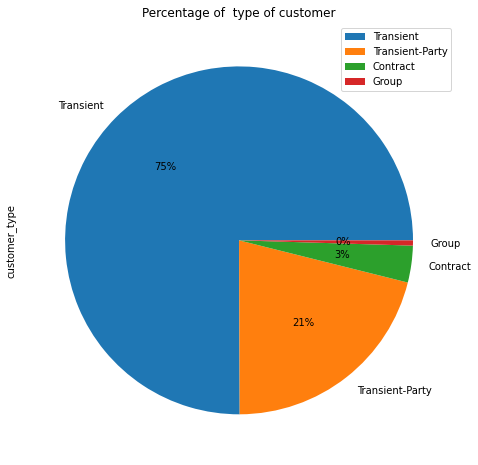

In [40]:
plt.figure(figsize = (14,8))
hotel_booking_df['customer_type'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Percentage of  type of customer')
plt.legend()
plt.show() 

## There are 4 types of Customers. Out of which mostly are from Transient Type with 75% share


# Analysis on the basis of Hotel and its attributes

### Count of Bookings Year-wise

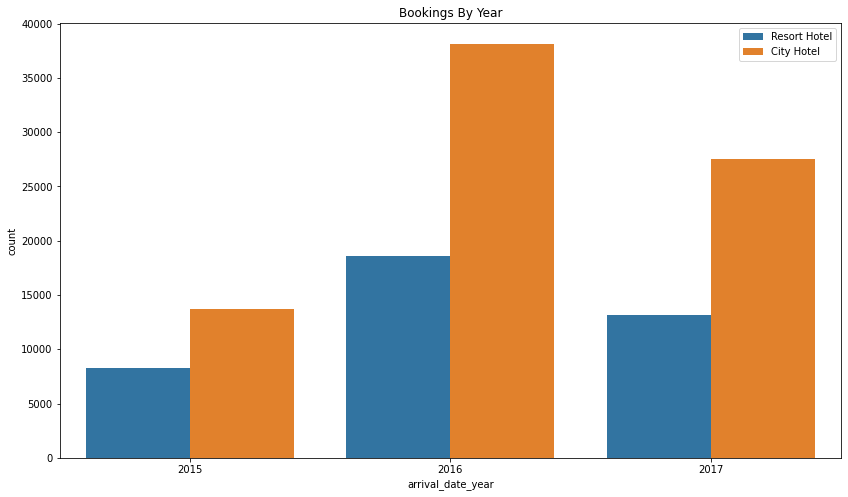

In [41]:
plt.figure(figsize = (14,8))
sns.countplot(x= 'arrival_date_year', data= hotel_booking_df, hue= 'hotel')
plt.title('Bookings By Year')
plt.legend()
plt.show() 

## Bookings for city hotels are higher than resort hotels by considering every years data except the year 2015.
## In the year 2016 both the hotels have the highest number of guests.

### Count of Bookings Month-wise

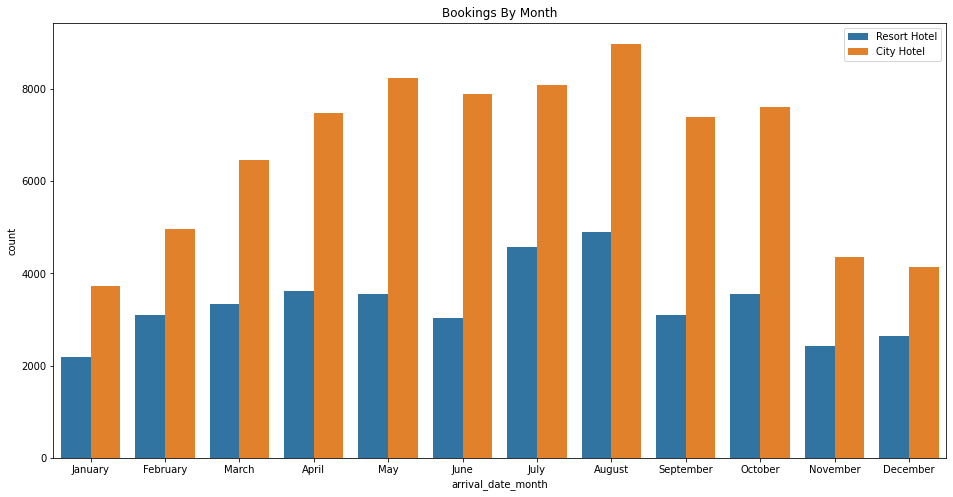

In [42]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel_booking_df['arrival_date_month'] = pd.Categorical(hotel_booking_df['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize = (16,8))
sns.countplot(x= 'arrival_date_month', data= hotel_booking_df, hue= 'hotel')
plt.title('Bookings By Month')
plt.legend()
plt.show() 


### Both the hotels have good occupancy in the 2nd and 3rd quarter of the year with 'August' being the highest of all

# Count of Bookings day of month wise

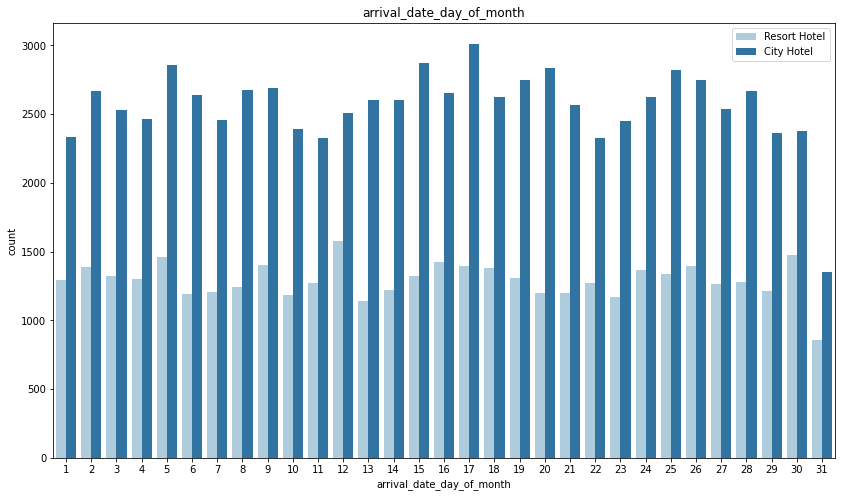

In [43]:
plt.figure(figsize = (14,8))
sns.countplot(x='arrival_date_day_of_month', data= hotel_booking_df, hue= 'hotel',palette='Paired')
plt.title('arrival_date_day_of_month')
plt.legend()
plt.show() 


Here we can conclude that the bookings in the month end are least. But that not true because as every month didn't have the 31 days thats why we see the less number of arrivals in the month end

# Number of bookings country wise

In [45]:
booking_count_of_country = hotel_booking_df['country'].value_counts().head(10)
booking_count_of_country.columns=['country','no of guests']
booking_count_of_country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

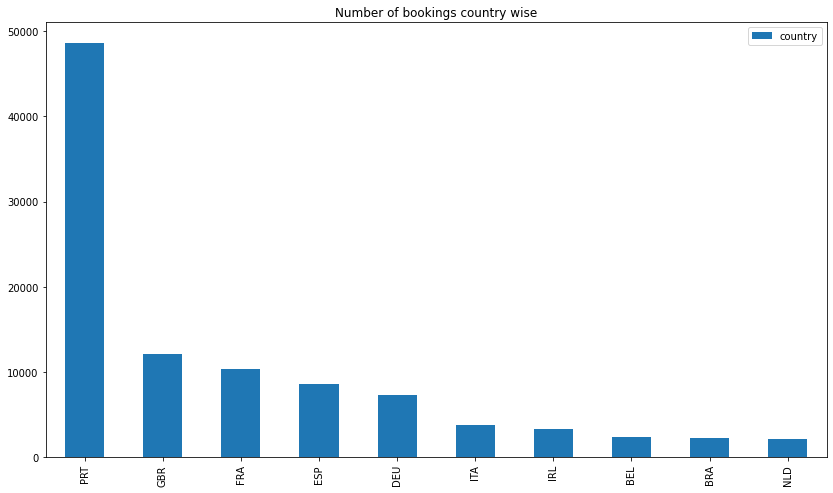

In [46]:
plt.figure(figsize = (14,8))
booking_count_of_country.plot(kind = 'bar')
plt.title('Number of bookings country wise')
plt.legend()
plt.show() 

## Most no. of guest are from Portugal and other Europian contries.

In [72]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           87230 non-null  object  
 1   is_canceled                     87230 non-null  int64   
 2   lead_time                       87230 non-null  int64   
 3   arrival_date_year               87230 non-null  int64   
 4   arrival_date_month              87230 non-null  category
 5   arrival_date_week_number        87230 non-null  int64   
 6   arrival_date_day_of_month       87230 non-null  int64   
 7   stays_in_weekend_nights         87230 non-null  int64   
 8   stays_in_week_nights            87230 non-null  int64   
 9   adults                          87230 non-null  int64   
 10  children                        87230 non-null  int64   
 11  babies                          87230 non-null  int64   
 12  meal             

# Total number of person staying together

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


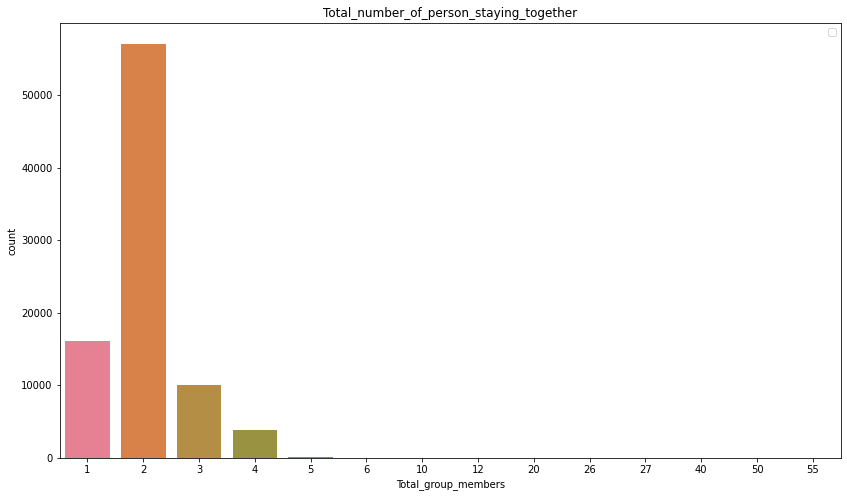

In [94]:
plt.figure(figsize = (14,8))
sns.countplot(df_hotel_booking['Total_group_members'], palette='husl')
plt.title('Total_number_of_person_staying_together')
plt.legend()
plt.show() 

## Most peoples like to come in pairs.

# Analysis of Number of Booking  Agent Wise

In [132]:
number_of_booking_per_agent = pd.DataFrame(df_hotel_booking['agent'].value_counts()).reset_index().rename(columns = {'index' : 'agent_number','agent':'number_of_booking'}).sort_values(by = 'number_of_booking',ascending = False)
number_of_booking_per_agent = number_of_booking_per_agent[0:10].sort_values(by = 'number_of_booking',ascending = False)


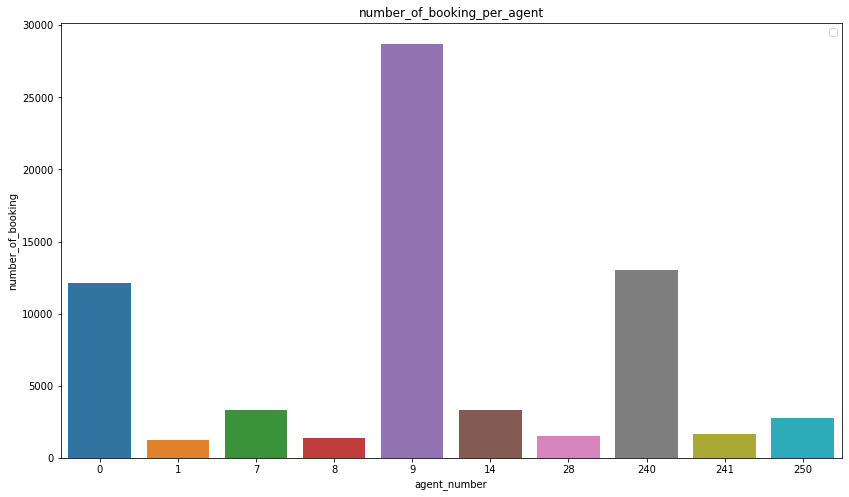

In [133]:
plt.figure(figsize = (14,8))
sns.barplot(x = 'agent_number',y = 'number_of_booking', data = number_of_booking_per_agent )
plt.title('number_of_booking_per_agent')
plt.legend()
plt.show() 

### Agent Having number 9 has made most number of bookings.

# Most preferred Room type Vs Average Daily Rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


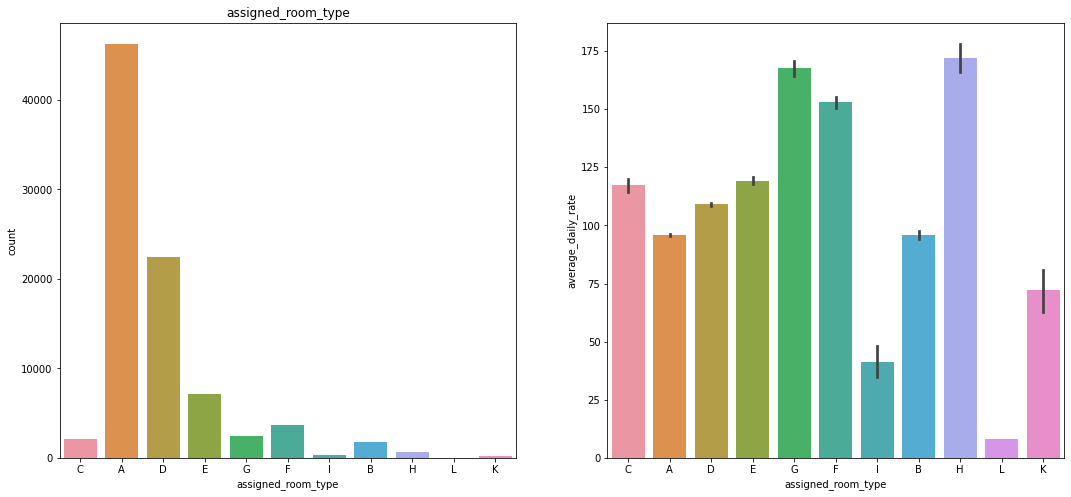

In [141]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.countplot(df_hotel_booking['assigned_room_type'])
plt.title('assigned_room_type')
plt.subplot(1,2,2)
sns.barplot(x='assigned_room_type', y='average_daily_rate', data =df_hotel_booking)
plt.show() 


## Room types A and D are preferred most by guests.
## But 'Average daily rate' is good for the rooms of type H,G,F and C.



# Stay length on the basis of  hotels



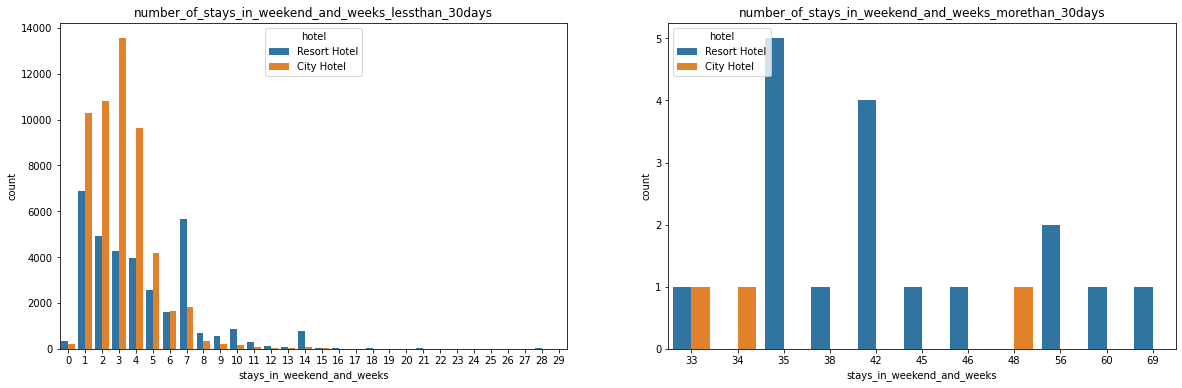

In [164]:
 # limiting stays_in_weekend_and_weeks to less than 30
number_of_stays_in_weekend_and_weeks_lessthan_30days = df_hotel_booking[df_hotel_booking['stays_in_weekend_and_weeks'] < 30]
 # limiting stays_in_weekend_and_weeks to greter than 30
number_of_stays_in_weekend_and_weeks_morethan_30days = df_hotel_booking[df_hotel_booking['stays_in_weekend_and_weeks'] > 30]
# Plotting a graph of both hotels for staying length
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.countplot(x = number_of_stays_in_weekend_and_weeks_lessthan_30days['stays_in_weekend_and_weeks'], hue = number_of_stays_in_weekend_and_weeks_lessthan_30days['hotel'])
plt.title('number_of_stays_in_weekend_and_weeks_lessthan_30days')
plt.subplot(1,2,2)
sns.countplot(x = number_of_stays_in_weekend_and_weeks_morethan_30days['stays_in_weekend_and_weeks'], hue = number_of_stays_in_weekend_and_weeks_morethan_30days['hotel'])
plt.title('number_of_stays_in_weekend_and_weeks_morethan_30days')
plt.show() 


### Most common stay length is less than or equal to 4 days.
### Generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# No. of guests staying at weekends and weekdays in both hotels

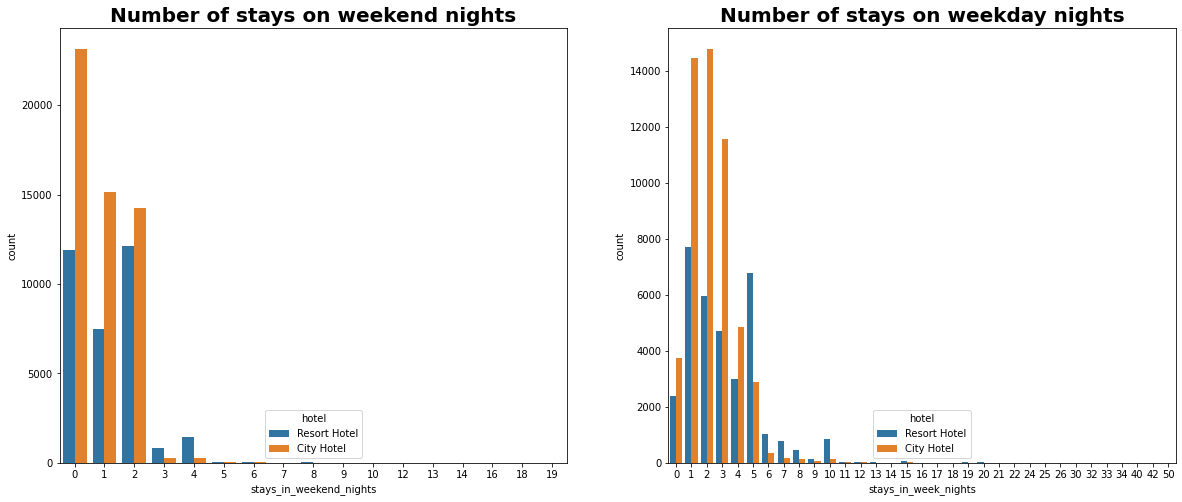

In [170]:
# Plotting a subplot graph for the no. of stays in weekends.
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df_hotel_booking)
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)

# Plotting a subplot graph for the no. of stays in weekdays.
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df_hotel_booking)
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.show()

### City hotels have more number of stays irrespective of week or weekend stays.